In [ ]:
"""Shampoo Sales Forecasting using ARIMA model"""

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
shampoo = pd.read_csv('datasets/shampoo.csv')
shampoo = shampoo[['Month', 'Sales']]

In [5]:
shampoo.head()

,Month,Sales
0,1-Jan,266.0
1,2-Jan,145.9
2,3-Jan,183.1
3,4-Jan,119.3
4,5-Jan,180.3


In [14]:
#So, we need this dataset as a series, then we can do:
shampoo = pd.read_csv('datasets/shampoo.csv', index_col = [0], parse_dates = True, squeeze=True)


In [15]:
type(shampoo)

pandas.core.series.Series

<AxesSubplot:xlabel='Month'>

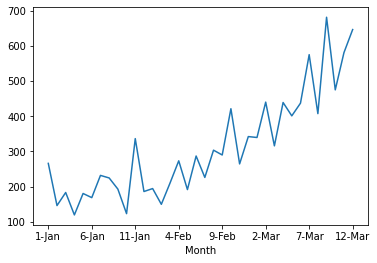

In [16]:
#Plot the series
shampoo.plot()

<AxesSubplot:xlabel='Month'>

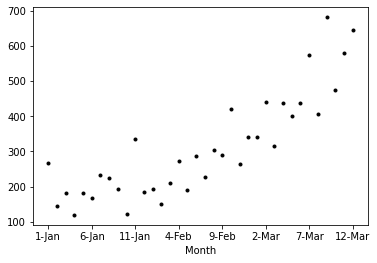

In [18]:
#Plot the series as a dot
shampoo.plot(style = 'k.')

In [19]:
#Points in the series
shampoo.size

36

In [20]:
#Describe the dataset
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

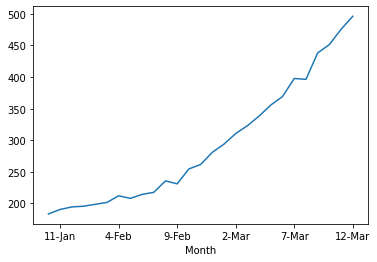

In [21]:
#If we are not sure about the data behaviour, we can use moving average.
shampoo.rolling(window = 10).mean().plot()

In [22]:
#As a first model we can do a baseline model.
shampoo_base = pd.concat([shampoo, shampoo.shift(1)], axis = 1)

In [24]:
shampoo_base.head(5)

,Sales,Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3


In [25]:
#Now, we change column names.
shampoo_base.columns = ['Actual_Sales', 'Forecast_Sales']

In [26]:
#Drop nan values
shampoo_base = shampoo_base.dropna()

In [27]:
#Calculate the error in the model
from sklearn.metrics import mean_squared_error
import numpy as np 

shampoo_error = mean_squared_error(shampoo_base['Actual_Sales'], shampoo_base['Forecast_Sales'])



In [28]:
np.sqrt(shampoo_error)

108.23764726616282

In [29]:
#Now we can do an ARIMA model. First we neeed ACF and PACF.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

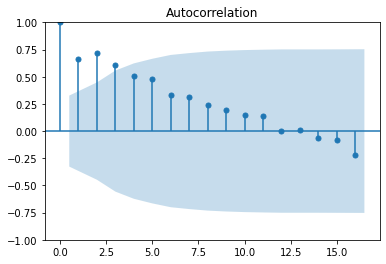

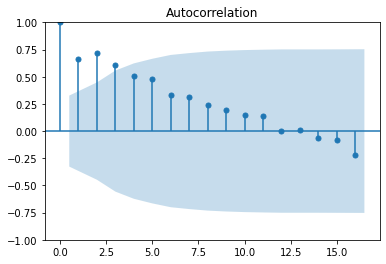

In [30]:
plot_acf(shampoo)
#Q = 3 (then the correlation goes bellow to the critical value)

c:\Users\Encin\Dropbox\My PC (LAPTOP-QC4SVF2M)\Desktop\Github\Projectos para Github\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


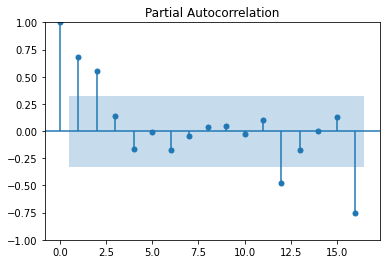

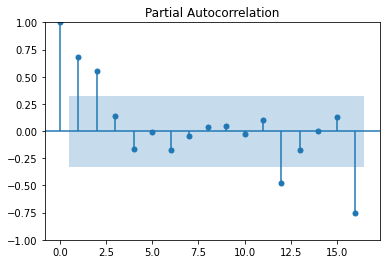

In [32]:
plot_pacf(shampoo)
#p = 2, d= 0-2

In [35]:
from statsmodels.tsa.arima.model import ARIMA
shampoo_train = shampoo[0:25]
shampoo_test = shampoo[25:]


In [37]:
#Train the model with our P, Q, D values.
shampoo_model = ARIMA(shampoo_train, order = (3,1,2))

c:\Users\Encin\Dropbox\My PC (LAPTOP-QC4SVF2M)\Desktop\Github\Projectos para Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\Users\Encin\Dropbox\My PC (LAPTOP-QC4SVF2M)\Desktop\Github\Projectos para Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\Users\Encin\Dropbox\My PC (LAPTOP-QC4SVF2M)\Desktop\Github\Projectos para Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [38]:
shampoo_model_fit = shampoo_model.fit()

c:\Users\Encin\Dropbox\My PC (LAPTOP-QC4SVF2M)\Desktop\Github\Projectos para Github\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
shampoo_forecast = shampoo_model_fit.forecast(steps = 11)

c:\Users\Encin\Dropbox\My PC (LAPTOP-QC4SVF2M)\Desktop\Github\Projectos para Github\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [41]:
np.sqrt(mean_squared_error (shampoo_test, shampoo_forecast))

177.72791963831258

In [42]:
#Our ARIMA model is worst than the baseline model, we need to check our parameters.
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
# for p in p_values:
#     for d in d_values:
#         for q in q_values:
#             order = (p,d,q)
#             train, test = shampoo[0:25], shampoo[25:]
#             predictions =list()
#             for i in range(len(test)):
#                 try:
#                     model = ARIMA(train, order)
#                     model_fit = model.fit(disp = 0)
#                     pred_y = model_fit.forecast()[0]
#                     predictions.append(pred_y)
#                     error = mean_squared_error(test, predictions)
#                     print('ARIMA {} RMSE = {}'.format(order, error))
#                 except Exception as e:
#                     print(e)
#                     continue